<a href="https://colab.research.google.com/github/AarthiKalyanasundaram/Datathon_Dphi/blob/master/DataSprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Sprint #3: Abalone**

This datathon was conducted by #Dphi team.

**Predicting the Age**

Predict the age of Abalone from physical measurements

**What is Abalon?**

Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae. Other common names are ear shells, sea ears, and muttonfish or muttonshells in Australia, ormer in the UK, perlemoen in South Africa, and paua in New Zealand.

**Objective**

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

Your objective is to determine the age of Abalone from the physical measurements.



In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
#Importing the train data and test data
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv")

**Exploratory Data Analysis starts here**

In [4]:
train_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


In [5]:
train_data.shape

(3132, 9)

**Finding the missing data**

In [6]:
train_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

**Data Visualizations**

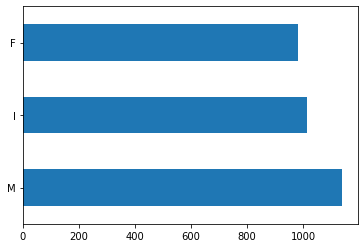

In [7]:
train_data.Sex.value_counts().plot.barh()

**Creating a pair plot**

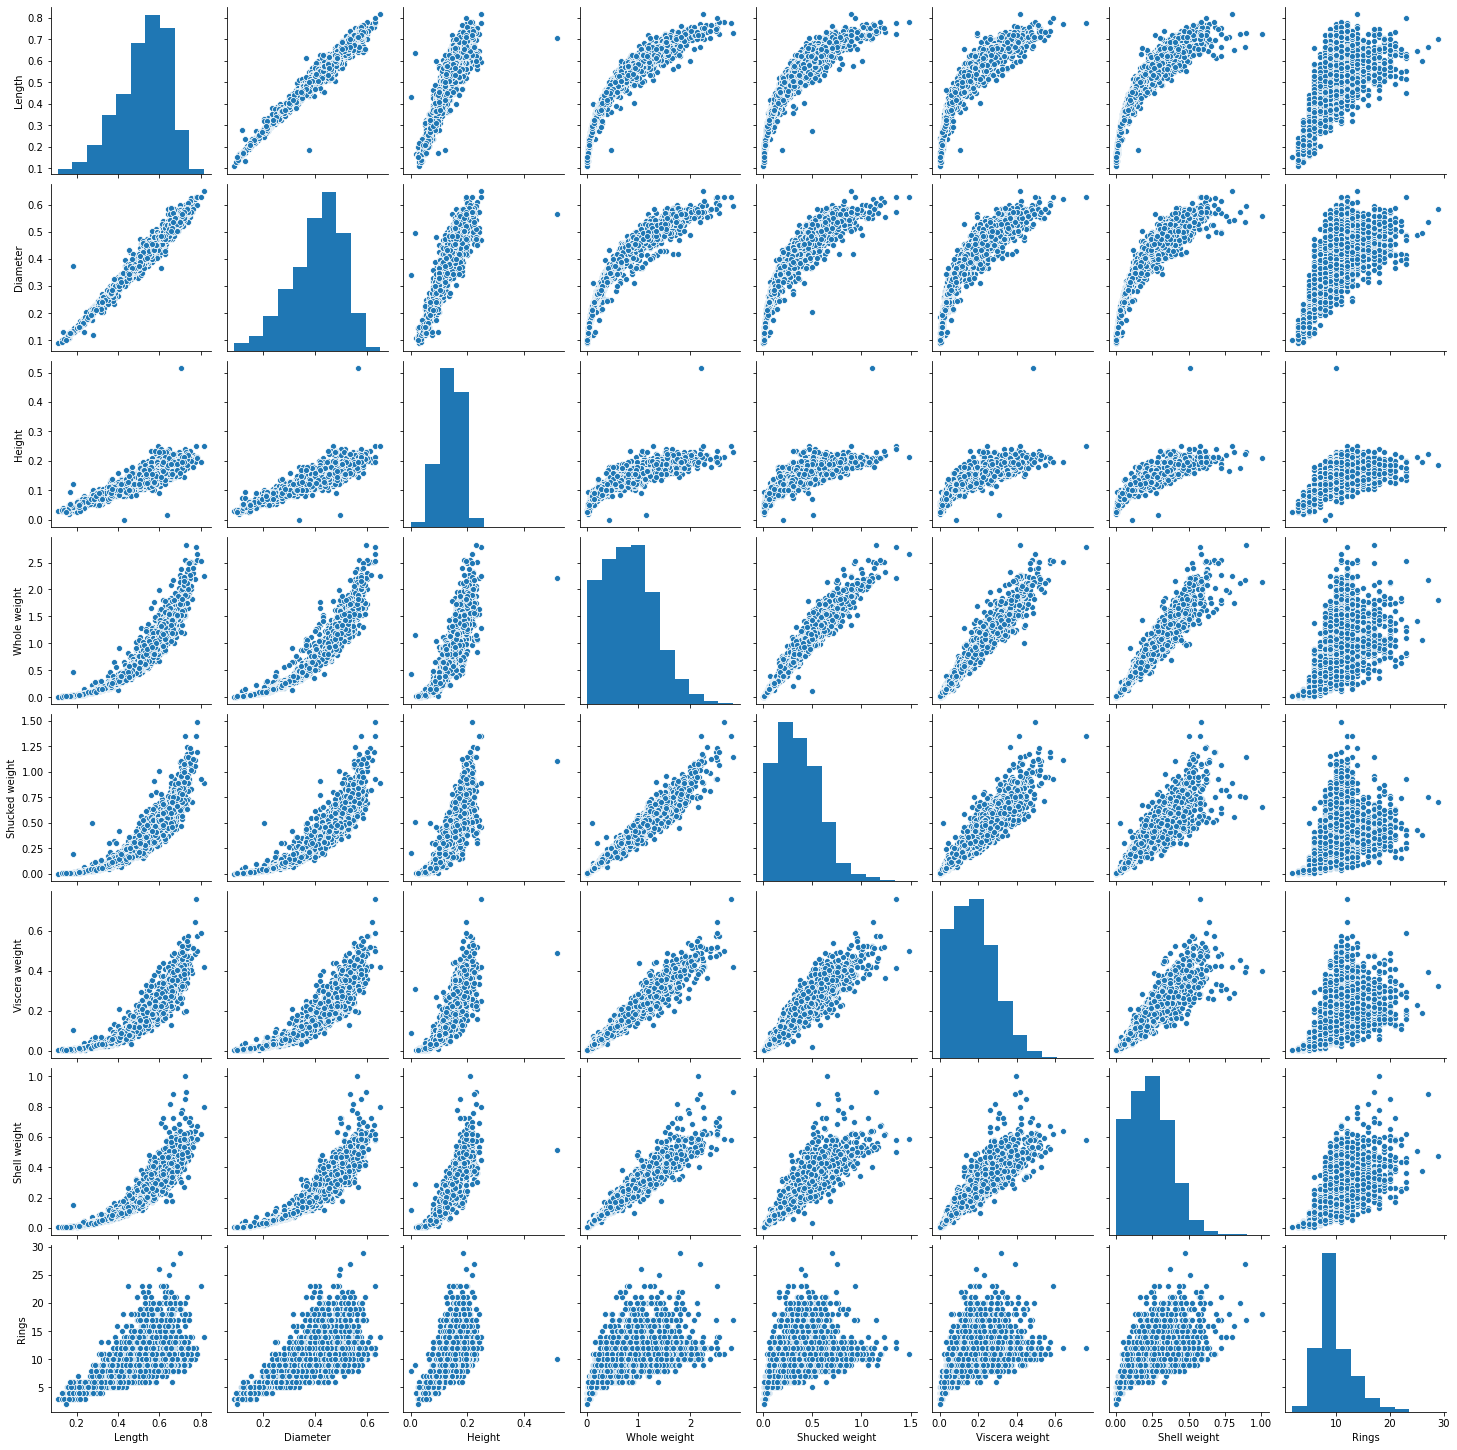

In [8]:
sns.pairplot(train_data)

**Creating a Heatmap to find out the correlation**

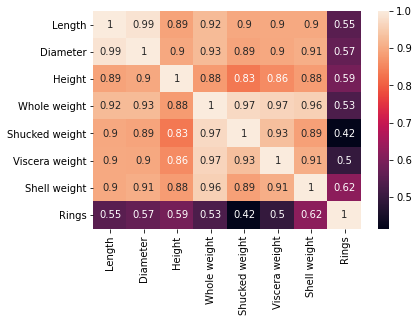

In [9]:
cor = train_data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [10]:
!pip install pycaret

     |████████████████████████████████| 256kB 4.9MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 1.2MB 10.3MB/s 
     |████████████████████████████████| 266kB 12.6MB/s 
     |████████████████████████████████| 1.6MB 20.9MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 65.9MB 58kB/s 
     |████████████████████████████████| 6.8MB 45.8MB/s 
     |████████████████████████████████| 12.4MB 47.0MB/s 
     |████████████████████████████████| 266kB 42.6MB/s 
     |████████████████████████████████| 235kB 43.3MB/s 
     |████████████████████████████████| 604kB 43.4MB/s 
     |████████████████████████████████| 3.1MB 40.8MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 552kB 44.0MB/s 
     |████████████████████████████████| 2.1MB 41.9MB/s 
 

In [17]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


**Setup the Environment for Pycaret**

In [36]:
#importing the pycaret

from pycaret.regression import *
reg = setup(data = train_data, target = 'Rings', session_id=1)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(3132, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


**Comparing the models**

In [37]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,1.5439,4.7616,2.1747,0.5385,0.1745,0.1521,0.1113
1,Bayesian Ridge,1.5753,4.7687,2.1804,0.5348,0.1799,0.1581,0.0055
2,Least Angle Regression,1.5761,4.7696,2.1807,0.5346,0.1800,0.1581,0.0067
3,Linear Regression,1.5766,4.7698,2.1808,0.5346,0.1801,0.1582,0.0054
4,CatBoost Regressor,1.5461,4.7968,2.1819,0.5342,0.1752,0.1518,1.9552
5,Gradient Boosting Regressor,1.5498,4.8218,2.1883,0.5327,0.1755,0.1526,0.3829
6,TheilSen Regressor,1.5685,4.7995,2.1872,0.5318,0.1818,0.1557,1.2446
7,Random Forest,1.5612,4.8561,2.1960,0.5288,0.1776,0.1544,0.7625
8,Ridge Regression,1.5826,4.8509,2.1980,0.5282,0.1813,0.1590,0.0049
9,Huber Regressor,1.5475,4.8692,2.2023,0.5264,0.1783,0.1497,0.0764


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

**Creating the model**

In [38]:
model = create_model("xgboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4601,4.1358,2.0337,0.6098,0.1679,0.1479
1,1.5200,4.3605,2.0882,0.5748,0.1732,0.1525
2,1.5206,5.6022,2.3669,0.5278,0.1721,0.1376
3,1.6194,5.1916,2.2785,0.5185,0.1868,0.1599
4,1.4469,4.1312,2.0325,0.5843,0.1612,0.1430
5,1.4877,4.2893,2.0711,0.5146,0.1694,0.1465
6,1.4282,3.7413,1.9342,0.5149,0.1650,0.1511
7,1.5249,4.2239,2.0552,0.5343,0.1674,0.1493
8,1.7494,6.0937,2.4685,0.5663,0.1947,0.1752
9,1.6814,5.8468,2.4180,0.4396,0.1876,0.1582


**Hyper Parameter Tuning**

In [39]:
tune_xgb = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5420,4.3608,2.0883,0.5886,0.1757,0.1589
1,1.5393,4.5768,2.1393,0.5537,0.1798,0.1550
2,1.5786,5.8757,2.4240,0.5047,0.1802,0.1429
3,1.6081,5.0720,2.2521,0.5296,0.1847,0.1572
4,1.4896,4.4067,2.0992,0.5566,0.1682,0.1456
5,1.6071,4.6632,2.1595,0.4723,0.1777,0.1594
6,1.4700,4.0715,2.0178,0.4720,0.1730,0.1546
7,1.5555,4.4255,2.1037,0.5120,0.1719,0.1520
8,1.7609,6.5209,2.5536,0.5359,0.2009,0.1751
9,1.7932,6.5237,2.5542,0.3747,0.1970,0.1679


**Evaluation of Model**

In [40]:
#To evaluate the tuned model

evaluate_model(tune_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
predict_model(tune_xgb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,1.5859,5.0746,2.2527,0.5176,0.1817,0.1584


In [42]:
final_xgboost = finalize_model(tune_xgb)

In [43]:
predict_model(final_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,0.0601,0.0139,0.1179,0.9987,0.0091,0.006


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings,Label
0,0.620,0.475,0.195,1.3585,0.5935,0.3365,0.3745,0.0,0.0,1.0,10,10.0229
1,0.565,0.450,0.195,1.0035,0.4060,0.2505,0.2850,1.0,0.0,0.0,15,14.9811
2,0.360,0.280,0.105,0.1990,0.0695,0.0450,0.0800,0.0,1.0,0.0,9,8.9708
3,0.430,0.325,0.090,0.4250,0.2170,0.0870,0.0950,0.0,1.0,0.0,7,6.9429
4,0.470,0.360,0.130,0.5225,0.1980,0.1065,0.1650,0.0,1.0,0.0,9,9.0257
...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.530,0.410,0.165,0.7320,0.1890,0.1700,0.3100,0.0,0.0,1.0,11,11.0311
936,0.660,0.515,0.195,1.5655,0.7345,0.3530,0.3860,0.0,0.0,1.0,9,9.0324
937,0.330,0.260,0.085,0.1965,0.0915,0.0425,0.0550,0.0,1.0,0.0,7,7.0226
938,0.640,0.540,0.175,1.2210,0.5100,0.2590,0.3900,1.0,0.0,0.0,15,14.8917


In [44]:
#predicting the (test data) using

predictions = predict_model(final_xgboost, data=test_data)
predictions.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Label
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785,10.0517
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650,6.5616
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900,7.3784
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700,11.7981
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490,8.8545


In [45]:
results = predictions["Label"]

In [46]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(results) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('results.csv')         
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>